<a href="https://colab.research.google.com/github/Loopercool/Data-Detectives/blob/main/Digant_202101403.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import math
from sklearn import preprocessing
import random
import string

import pytz
from datetime import datetime
from sklearn.impute import KNNImputer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_mining/Project/dataset/EVChargingStationUsage.csv')
df.head()

NameError: ignored

In [ ]:
df = df.dropna(subset=['Ended By'])

In [ ]:
print(df.columns)

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')


In [ ]:
df.describe()

,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,EVSE ID,Postal Code,Latitude,Longitude,Fee,Plug In Event Id,Driver Postal Code,System S/N
count,259415.000000,259415.000000,259415.000000,259415.000000,1.804670e+05,259415.000000,259415.000000,259415.000000,259415.000000,2.594150e+05,251013.000000,1.804670e+05
mean,8.544277,3.588596,1.072306,1.591627,1.462973e+05,94302.315768,37.439565,-122.151264,1.097481,1.188685e+08,94170.308255,1.443790e+11
std,7.185462,3.017894,0.901776,0.491534,2.429677e+05,1.941657,0.009621,0.015382,1.934408,4.057750e+08,4249.837126,2.483280e+10
min,0.010000,0.004000,0.001000,1.000000,3.792000e+03,94301.000000,37.422104,-122.163239,0.000000,1.000000e+00,1013.000000,1.023100e+11
25%,3.784000,1.589000,0.475000,1.000000,4.358300e+04,94301.000000,37.428318,-122.162170,0.000000,1.573000e+03,94087.000000,1.231100e+11
50%,6.868634,2.885000,0.862000,2.000000,1.074270e+05,94301.000000,37.444489,-122.158272,0.000000,3.573000e+03,94304.000000,1.427410e+11
75%,11.458340,4.813000,1.438000,2.000000,1.745590e+05,94303.000000,37.446613,-122.145699,1.640000,6.340000e+03,94804.000000,1.705410e+11
max,97.360000,40.891000,12.219000,2.000000,5.535441e+06,94306.000000,37.449375,-122.112480,84.560000,1.609436e+09,99354.000000,2.002410e+11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

In [ ]:
columns_to_drop=['Energy (kWh)','GHG Savings (kg)','Gasoline Savings (gallons)','Currency','Country','Org Name','Plug Type','Port Type','Port Number']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
print(df.columns)

Index(['Station Name', 'MAC Address', 'Start Date', 'Start Time Zone',
       'End Date', 'End Time Zone', 'Transaction Date (Pacific Time)',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'EVSE ID',
       'Address 1', 'City', 'State/Province', 'Postal Code', 'Latitude',
       'Longitude', 'Fee', 'Ended By', 'Plug In Event Id',
       'Driver Postal Code', 'User ID', 'County', 'System S/N',
       'Model Number'],
      dtype='object')


In [ ]:
df.shape

(259415, 24)

In [ ]:
column_to_clean = "EVSE ID"  # Replace with the actual column name

# Convert non-numeric values to NaN in the specified column
df[column_to_clean] = pd.to_numeric(df[column_to_clean], errors="coerce")

In [ ]:
# List of patterns for which synthesized values will be generated
patterns = ['CTxxxx-HD', 'CTHCR', 'CT2100-HD', 'CT4020']

# Function to generate a new value based on existing patterns
def generate_synthesized_value(pattern):
    if pattern == 'Other':
        return pattern
    new_value = pattern.replace('xxxx', ''.join(random.choices(string.digits, k=4)))
    new_value += '-' + ''.join(random.choices(string.ascii_uppercase, k=2))
    return new_value

# Iterate through the DataFrame and replace NaN values with synthesized data
for index, row in df.iterrows():
    value = row['Model Number']
    if pd.isnull(value):
        synthesized_value = generate_synthesized_value(random.choice(patterns))
        df.at[index, 'Model Number'] = synthesized_value

print(df)

                          Station Name          MAC Address        Start Date  \
0           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   7/29/2011 20:17   
1           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76    7/30/2011 0:00   
2           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76    7/30/2011 8:16   
3           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   7/30/2011 14:51   
4           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   7/30/2011 18:51   
...                                ...                  ...               ...   
259410  PALO ALTO CA / TED THOMPSON #3  0024:B100:0002:9F81  12/31/2020 16:39   
259411       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  12/31/2020 16:48   
259412           PALO ALTO CA / MPL #4  0024:B100:0003:CD37  12/31/2020 17:28   
259413       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  12/31/2020 17:49   
259414     PALO ALTO CA / CAMBRIDGE #4  0024:B100:0003:3A0A  12/31/2020 18:19   

       Start Time Zone     

In [ ]:
column_to_check = "Model Number"  # Replace with the actual column name

# Find and count null values in the specified column
null_values = df[column_to_check].isnull()
count_null = null_values.sum()

print("Null values in column '{}': {}".format(column_to_check, count_null))

Null values in column 'Model Number': 0


In [ ]:
df.head()

,Station Name,MAC Address,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),EVSE ID,...,Latitude,Longitude,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,NaN,...,37.444572,-122.160309,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,CT2100-HD-BW
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,NaN,...,37.444572,-122.160309,0.0,Customer,4,94301.0,4169.0,NaN,NaN,CT4020-TR
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,NaN,...,37.444572,-122.160309,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,CTHCR-TU
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,NaN,...,37.444572,-122.160309,0.0,Customer,6,94302.0,2545.0,NaN,NaN,CTHCR-DY
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,NaN,...,37.444572,-122.160309,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,CT2100-HD-VT


In [ ]:
feature_to_impute = "EVSE ID"  # Replace with the actual feature name
missing_indices = df[df[feature_to_impute].isnull()].index

# Create a KNNImputer instance
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Extract the feature to impute and perform KNN imputation
feature_data = df[[feature_to_impute]]
imputed_feature = imputer.fit_transform(feature_data)

# Replace the missing values in the original data with imputed values
df.loc[missing_indices, feature_to_impute] = imputed_feature[missing_indices]

In [ ]:
column_to_check = "EVSE ID"  # Replace with the actual column name

# Find and count null values in the specified column
null_values = df[column_to_check].isnull()
count_null = null_values.sum()

print("Null values in column '{}': {}".format(column_to_check, count_null))

Null values in column 'EVSE ID': 0


In [ ]:
# Specify the column to clean
column_to_clean = "Driver Postal Code"  # Replace with the actual column name

# Convert non-numeric values to NaN in the specified column
df[column_to_clean] = pd.to_numeric(df[column_to_clean], errors="coerce")

# Drop rows with NaN values in the specified column
# data.dropna(subset=[column_to_clean], inplace=True)

In [ ]:
feature_to_impute = "Driver Postal Code"  # Replace with the actual feature name
missing_indices = df[df[feature_to_impute].isnull()].index

# Create a KNNImputer instance
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Extract the feature to impute and perform KNN imputation
feature_data = df[[feature_to_impute]]
imputed_feature = imputer.fit_transform(feature_data)

# Replace the missing values in the original data with imputed values
df.loc[missing_indices, feature_to_impute] = imputed_feature[missing_indices]

In [ ]:
# Specify the column to check for null values
column_to_check = "Driver Postal Code"  # Replace with the actual column name

# Find and count null values in the specified column
null_values = df[column_to_check].isnull()
count_null = null_values.sum()

print("Null values in column '{}': {}".format(column_to_check, count_null))

Null values in column 'Driver Postal Code': 0


In [ ]:
feature_to_impute = "System S/N"  # Replace with the actual feature name
missing_indices = df[df[feature_to_impute].isnull()].index

# Create a KNNImputer instance
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Extract the feature to impute and perform KNN imputation
feature_data = df[[feature_to_impute]]
imputed_feature = imputer.fit_transform(feature_data)

# Replace the missing values in the original data with imputed values
df.loc[missing_indices, feature_to_impute] = imputed_feature[missing_indices]

In [ ]:
selected_columns = ["Start Date", "Start Time Zone"]

# Create a new DataFrame with the selected columns
dfa = df[selected_columns]

In [ ]:
# Define time zones
pst = pytz.timezone('US/Pacific')
pdt = pytz.timezone('US/Pacific')

# Function to convert PST to PDT
def convert_pst_to_pdt(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    dt_object = pst.localize(dt_object)
    dt_object_pdt = dt_object.astimezone(pdt)

    return dt_object_pdt

# Function to convert date and time to numeric value
def convert_to_numeric(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    numeric_value = dt_object.timestamp()

    return numeric_value

# Convert PST to PDT and apply numeric conversion
converted_date_times = []
numeric_values = []

for index, row in dfa.iterrows():
    if row["Start Time Zone"] == "PST":
        converted_dt = convert_pst_to_pdt(row["Start Date"])
    else:
        converted_dt = datetime.strptime(row["Start Date"], "%m/%d/%Y %H:%M")

    converted_date_times.append(converted_dt)
    numeric_value = convert_to_numeric(row["Start Date"])
    numeric_values.append(numeric_value)

dfa["ConvertedDateTime"] = converted_date_times
dfa["NumericValue"] = numeric_values

print(dfa)


              Start Date Start Time Zone          ConvertedDateTime  \
0        7/29/2011 20:17             PDT        2011-07-29 20:17:00   
1         7/30/2011 0:00             PDT        2011-07-30 00:00:00   
2         7/30/2011 8:16             PDT        2011-07-30 08:16:00   
3        7/30/2011 14:51             PDT        2011-07-30 14:51:00   
4        7/30/2011 18:51             PDT        2011-07-30 18:51:00   
...                  ...             ...                        ...   
259410  12/31/2020 16:39             PST  2020-12-31 16:39:00-08:00   
259411  12/31/2020 16:48             PST  2020-12-31 16:48:00-08:00   
259412  12/31/2020 17:28             PST  2020-12-31 17:28:00-08:00   
259413  12/31/2020 17:49             PST  2020-12-31 17:49:00-08:00   
259414  12/31/2020 18:19             PST  2020-12-31 18:19:00-08:00   

        NumericValue  
0       1.311971e+09  
1       1.311984e+09  
2       1.312014e+09  
3       1.312037e+09  
4       1.312052e+09  
...      

<ipython-input-24-af567324c9d4>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["ConvertedDateTime"] = converted_date_times
<ipython-input-24-af567324c9d4>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["NumericValue"] = numeric_values


In [ ]:
dfa.head()

,Start Date,Start Time Zone,ConvertedDateTime,NumericValue
0,7/29/2011 20:17,PDT,2011-07-29 20:17:00,1.311971e+09
1,7/30/2011 0:00,PDT,2011-07-30 00:00:00,1.311984e+09
2,7/30/2011 8:16,PDT,2011-07-30 08:16:00,1.312014e+09
3,7/30/2011 14:51,PDT,2011-07-30 14:51:00,1.312037e+09
4,7/30/2011 18:51,PDT,2011-07-30 18:51:00,1.312052e+09


In [ ]:
df["Start Date"] = dfa["NumericValue"]

In [ ]:
df.head()

,Station Name,MAC Address,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),EVSE ID,...,Latitude,Longitude,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.311971e+09,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,146297.26074,...,37.444572,-122.160309,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,1.443790e+11,CT2100-HD-BW
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.311984e+09,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,146297.26074,...,37.444572,-122.160309,0.0,Customer,4,94301.0,4169.0,NaN,1.443790e+11,CT4020-TR
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.312014e+09,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,146297.26074,...,37.444572,-122.160309,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,1.443790e+11,CTHCR-TU
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.312037e+09,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,146297.26074,...,37.444572,-122.160309,0.0,Customer,6,94302.0,2545.0,NaN,1.443790e+11,CTHCR-DY
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.312052e+09,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,146297.26074,...,37.444572,-122.160309,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,1.443790e+11,CT2100-HD-VT


In [ ]:
print("Original dataset:")
print(df)

# Function to check if a value is a valid date and time format
def is_valid_datetime(value):
    try:
        datetime.strptime(value, '%m/%d/%Y %H:%M')
        return True
    except ValueError:
        return False

# Filter out rows with invalid date and time values
df = df[df['End Date'].apply(is_valid_datetime)]

# Print the dataset after dropping invalid rows
print("\nDataset after dropping invalid rows:")
print(df)

Original dataset:
                          Station Name          MAC Address    Start Date  \
0           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.311971e+09   
1           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.311984e+09   
2           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.312014e+09   
3           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.312037e+09   
4           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.312052e+09   
...                                ...                  ...           ...   
259410  PALO ALTO CA / TED THOMPSON #3  0024:B100:0002:9F81  1.609433e+09   
259411       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  1.609433e+09   
259412           PALO ALTO CA / MPL #4  0024:B100:0003:CD37  1.609436e+09   
259413       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  1.609437e+09   
259414     PALO ALTO CA / CAMBRIDGE #4  0024:B100:0003:3A0A  1.609439e+09   

       Start Time Zone          End Date End Time Zone  \

In [ ]:
selected_columns = ['End Date', 'End Time Zone']

# Create a new DataFrame with the selected columns
dfb = df[selected_columns]

In [ ]:
import pandas as pd
import pytz
from datetime import datetime

# Define time zones
pst = pytz.timezone('US/Pacific')
pdt = pytz.timezone('US/Pacific')

# Function to convert PST to PDT
def convert_pst_to_pdt(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    dt_object = pst.localize(dt_object)
    dt_object_pdt = dt_object.astimezone(pdt)

    return dt_object_pdt

# Function to convert date and time to numeric value
def convert_to_numeric(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    numeric_value = dt_object.timestamp()

    return numeric_value

# Convert PST to PDT and apply numeric conversion
converted_date_times = []
numeric_values = []

for index, row in dfb.iterrows():
    if row["End Time Zone"] == "PST":
        converted_dt = convert_pst_to_pdt(row["End Date"])
    else:
        converted_dt = datetime.strptime(row["End Date"], "%m/%d/%Y %H:%M")

    converted_date_times.append(converted_dt)
    numeric_value = convert_to_numeric(row["End Date"])
    numeric_values.append(numeric_value)

dfb["ConvertedDateTime"] = converted_date_times
dfb["NumericValue"] = numeric_values

print(dfb)


                End Date End Time Zone          ConvertedDateTime  \
0        7/29/2011 23:20           PDT        2011-07-29 23:20:00   
1         7/30/2011 0:02           PDT        2011-07-30 00:02:00   
2        7/30/2011 12:34           PDT        2011-07-30 12:34:00   
3        7/30/2011 16:55           PDT        2011-07-30 16:55:00   
4        7/30/2011 20:03           PDT        2011-07-30 20:03:00   
...                  ...           ...                        ...   
259410  12/31/2020 17:14           PST  2020-12-31 17:14:00-08:00   
259411  12/31/2020 20:31           PST  2020-12-31 20:31:00-08:00   
259412    1/1/2021 10:56           PST  2021-01-01 10:56:00-08:00   
259413  12/31/2020 21:55           PST  2020-12-31 21:55:00-08:00   
259414  12/31/2020 19:01           PST  2020-12-31 19:01:00-08:00   

        NumericValue  
0       1.311982e+09  
1       1.311984e+09  
2       1.312029e+09  
3       1.312045e+09  
4       1.312056e+09  
...              ...  
259410  1.

<ipython-input-30-33177a2b38be>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb["ConvertedDateTime"] = converted_date_times
<ipython-input-30-33177a2b38be>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb["NumericValue"] = numeric_values


In [ ]:
df["End Date"] = dfa["NumericValue"]

In [ ]:
columns_to_drop=['Start Time Zone','End Time Zone','Transaction Date (Pacific Time)']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'End Date',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'EVSE ID',
       'Address 1', 'City', 'State/Province', 'Postal Code', 'Latitude',
       'Longitude', 'Fee', 'Ended By', 'Plug In Event Id',
       'Driver Postal Code', 'User ID', 'County', 'System S/N',
       'Model Number'],
      dtype='object')

In [ ]:
def time_to_numeric(time_str):
    hours, minutes, seconds = map(int, time_str.split(':'))
    total_hours = hours + minutes / 60 + seconds / 3600
    return total_hours

df['Total_time_hours'] = df['Total Duration (hh:mm:ss)'].apply(time_to_numeric)

df['Charging_time_hours'] = df['Charging Time (hh:mm:ss)'].apply(time_to_numeric)

In [ ]:
columns_to_drop=['Total Duration (hh:mm:ss)','Charging Time (hh:mm:ss)']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'End Date', 'EVSE ID',
       'Address 1', 'City', 'State/Province', 'Postal Code', 'Latitude',
       'Longitude', 'Fee', 'Ended By', 'Plug In Event Id',
       'Driver Postal Code', 'User ID', 'County', 'System S/N', 'Model Number',
       'Total_time_hours', 'Charging_time_hours'],
      dtype='object')

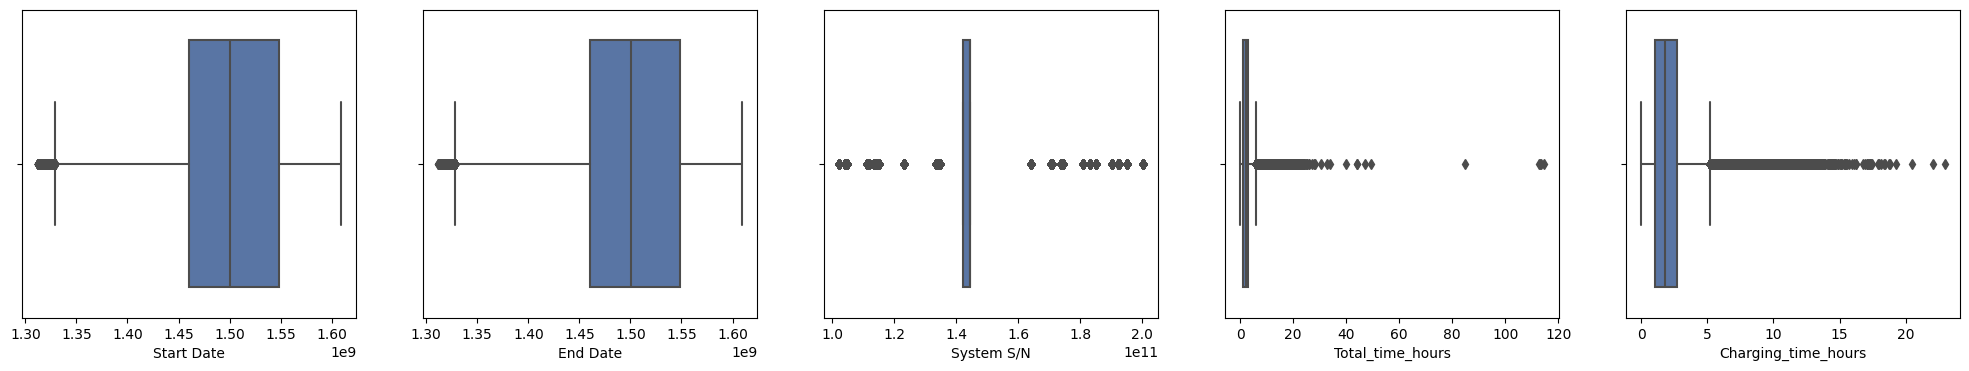

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(25,4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(['Start Date', 'End Date','System S/N',
       'Total_time_hours', 'Charging_time_hours' ]):
    sns.boxplot(x=df[col], ax=ax[axid])

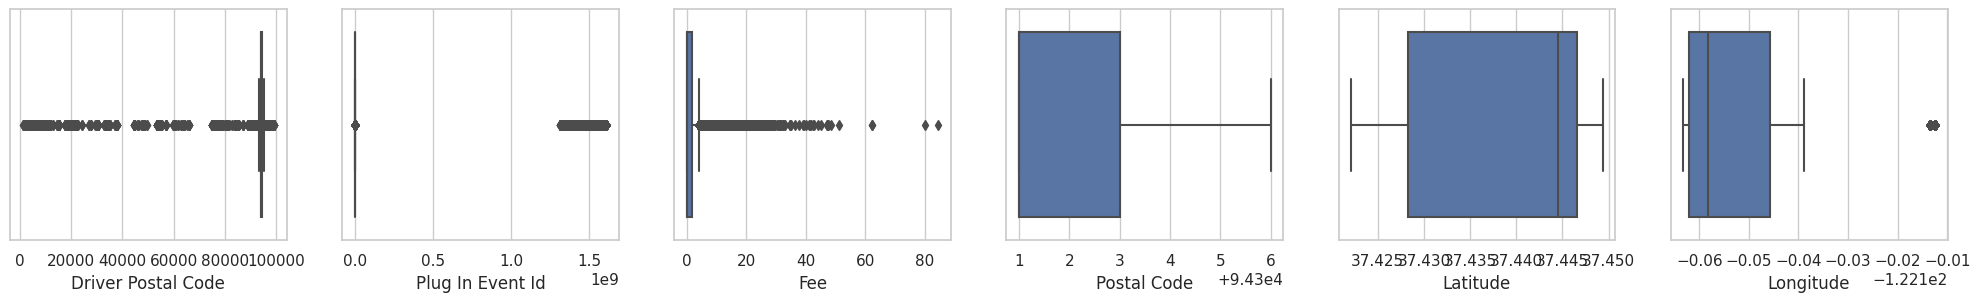

In [ ]:
fig, ax = plt.subplots(1, 6, figsize=(25,3))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(['Driver Postal Code', 'Plug In Event Id', 'Fee','Postal Code', 'Latitude',
       'Longitude'  ]):
    sns.boxplot(x=df[col], ax=ax[axid])

In [ ]:
per25 = df['Driver Postal Code'].quantile(0.25)
per75 = df['Driver Postal Code'].quantile(0.75)

In [ ]:
iqr = per75 - per25

In [ ]:
iqr

531.0

In [ ]:

columns_to_handle = ['Driver Postal Code', 'Plug In Event Id', 'Fee','Postal Code', 'Latitude',
       'Longitude','Start Date', 'End Date','System S/N',
       'Total_time_hours', 'Charging_time_hours']

# Define a function to handle outliers using IQR
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
    return df

# Apply the IQR-based outlier handling to each column
for col in columns_to_handle:
    df = handle_outliers_iqr(df, col)

# Print the DataFrame after handling outliers
print(df)

                          Station Name          MAC Address    Start Date  \
0           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.328615e+09   
1           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.328615e+09   
2           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.328615e+09   
3           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.328615e+09   
4           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.328615e+09   
...                                ...                  ...           ...   
259410  PALO ALTO CA / TED THOMPSON #3  0024:B100:0002:9F81  1.609433e+09   
259411       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  1.609433e+09   
259412           PALO ALTO CA / MPL #4  0024:B100:0003:CD37  1.609436e+09   
259413       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  1.609437e+09   
259414     PALO ALTO CA / CAMBRIDGE #4  0024:B100:0003:3A0A  1.609439e+09   

            End Date       EVSE ID            Address 1       City  \
0    

In [ ]:
df.shape

(259375, 21)

# **Lable encoding and one hot encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Assuming 'string_column' is the name of the column containing string data
df['Label_encode_station_Name'] = label_encoder.fit_transform(df['Station Name'])

In [ ]:
df.head()

,Station Name,MAC Address,Start Date,End Date,EVSE ID,Address 1,City,State/Province,Postal Code,Latitude,...,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number,Total_time_hours,Charging_time_hours,Label_encode
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.328615e+09,1.328615e+09,146297.26074,250 Hamilton Ave,Palo Alto,California,94301,37.444572,...,Plug Out at Vehicle,3.0,95124.0,3284.0,NaN,1.443790e+11,CT2100-HD-BW,3.058889,1.900833,12
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.328615e+09,1.328615e+09,146297.26074,250 Hamilton Ave,Palo Alto,California,94301,37.444572,...,Customer,4.0,94301.0,4169.0,NaN,1.443790e+11,CT4020-TR,0.035000,0.031667,12
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.328615e+09,1.328615e+09,146297.26074,250 Hamilton Ave,Palo Alto,California,94301,37.444572,...,Plug Out at Vehicle,5.0,94301.0,4169.0,NaN,1.443790e+11,CTHCR-TU,4.292222,4.291111,12
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.328615e+09,1.328615e+09,146297.26074,250 Hamilton Ave,Palo Alto,California,94301,37.444572,...,Customer,6.0,94302.0,2545.0,NaN,1.443790e+11,CTHCR-DY,2.056667,2.049444,12
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.328615e+09,1.328615e+09,146297.26074,250 Hamilton Ave,Palo Alto,California,94301,37.444572,...,Plug Out at Vehicle,7.0,94043.0,3765.0,NaN,1.443790e+11,CT2100-HD-VT,1.190000,0.731667,12


# **One hot encoding Station Name**

In [ ]:
# Assuming 'string_column' is the name of the column containing string data
encoded_columns = pd.get_dummies(df['Station Name'], prefix='Station Name',drop_first=True)

In [ ]:
encoded_columns.columns

Index(['Station Name_PALO ALTO CA / BRYANT #1',
       'Station Name_PALO ALTO CA / BRYANT #2',
       'Station Name_PALO ALTO CA / BRYANT #3',
       'Station Name_PALO ALTO CA / BRYANT #4',
       'Station Name_PALO ALTO CA / BRYANT #5',
       'Station Name_PALO ALTO CA / BRYANT #6',
       'Station Name_PALO ALTO CA / CAMBRIDGE #1',
       'Station Name_PALO ALTO CA / CAMBRIDGE #2',
       'Station Name_PALO ALTO CA / CAMBRIDGE #3',
       'Station Name_PALO ALTO CA / CAMBRIDGE #4',
       'Station Name_PALO ALTO CA / CAMBRIDGE #5',
       'Station Name_PALO ALTO CA / HAMILTON #1',
       'Station Name_PALO ALTO CA / HAMILTON #2',
       'Station Name_PALO ALTO CA / HIGH #1',
       'Station Name_PALO ALTO CA / HIGH #2',
       'Station Name_PALO ALTO CA / HIGH #3',
       'Station Name_PALO ALTO CA / HIGH #4',
       'Station Name_PALO ALTO CA / MPL #1',
       'Station Name_PALO ALTO CA / MPL #2',
       'Station Name_PALO ALTO CA / MPL #3',
       'Station Name_PALO ALTO CA / MP

In [ ]:
encoded_columns.shape

(259375, 46)

In [ ]:
data = pd.Series(df['Station Name'])

# Using value_counts to count unique values
value_counts = data.value_counts()

print(value_counts)

PALO ALTO CA / HAMILTON #2        23718
PALO ALTO CA / HAMILTON #1        14886
PALO ALTO CA / WEBSTER #1         14430
PALO ALTO CA / BRYANT #2          14388
PALO ALTO CA / HIGH #4            13898
PALO ALTO CA / BRYANT #1          13435
PALO ALTO CA / WEBSTER #2         12667
PALO ALTO CA / CAMBRIDGE #1       11162
PALO ALTO CA / HIGH #1            10752
PALO ALTO CA / WEBSTER #3         10482
PALO ALTO CA / TED THOMPSON #1     9812
PALO ALTO CA / CAMBRIDGE #2        9253
PALO ALTO CA / MPL #6              8993
PALO ALTO CA / HIGH #3             8313
PALO ALTO CA / MPL #4              7787
PALO ALTO CA / MPL #5              7541
PALO ALTO CA / HIGH #2             6928
PALO ALTO CA / RINCONADA LIB 3     6499
PALO ALTO CA / RINCONADA LIB 1     6212
PALO ALTO CA / BRYANT #6           5857
PALO ALTO CA / RINCONADA LIB 2     5552
PALO ALTO CA / BRYANT #5           5331
PALO ALTO CA / CAMBRIDGE #5        4556
PALO ALTO CA / CAMBRIDGE #3        4476
PALO ALTO CA / BRYANT #3           4473


In [ ]:
df['Station Name'].nunique()
threshold=5000

In [ ]:
repl = value_counts[value_counts<=threshold].index

In [ ]:
one_hot_col_stat = pd.get_dummies(df['Station Name'].replace(repl,'uncommon'))

In [ ]:
one_hot_col_stat.columns

Index(['PALO ALTO CA / BRYANT #1', 'PALO ALTO CA / BRYANT #2',
       'PALO ALTO CA / BRYANT #5', 'PALO ALTO CA / BRYANT #6',
       'PALO ALTO CA / CAMBRIDGE #1', 'PALO ALTO CA / CAMBRIDGE #2',
       'PALO ALTO CA / HAMILTON #1', 'PALO ALTO CA / HAMILTON #2',
       'PALO ALTO CA / HIGH #1', 'PALO ALTO CA / HIGH #2',
       'PALO ALTO CA / HIGH #3', 'PALO ALTO CA / HIGH #4',
       'PALO ALTO CA / MPL #4', 'PALO ALTO CA / MPL #5',
       'PALO ALTO CA / MPL #6', 'PALO ALTO CA / RINCONADA LIB 1',
       'PALO ALTO CA / RINCONADA LIB 2', 'PALO ALTO CA / RINCONADA LIB 3',
       'PALO ALTO CA / TED THOMPSON #1', 'PALO ALTO CA / WEBSTER #1',
       'PALO ALTO CA / WEBSTER #2', 'PALO ALTO CA / WEBSTER #3', 'uncommon'],
      dtype='object')

# **Dropping City and State**
# **Reason:- Contain single value**

In [ ]:
df = df.drop(['City', 'State/Province'],axis=1)

In [ ]:
df.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'End Date', 'EVSE ID',
       'Address 1', 'Postal Code', 'Latitude', 'Longitude', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number', 'Total_time_hours', 'Charging_time_hours',
       'Label_encode'],
      dtype='object')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_mining/Project/dataset/df_processed.csv')

<ipython-input-3-2b2a156bf99e>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/data_mining/Project/dataset/df_processed.csv')


# **Label encoding County**

In [ ]:
label_encoder = LabelEncoder()

# Assuming 'string_column' is the name of the column containing string data
df['Label_encode_County'] = label_encoder.fit_transform(df['County'])

In [ ]:
df = df.drop(["Label_encode"],axis=1)

In [ ]:
df.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'End Date', 'EVSE ID',
       'Address 1', 'Postal Code', 'Latitude', 'Longitude', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'System S/N',
       'Model Number', 'Total_time_hours', 'Charging_time_hours',
       'Label_encode_station_Name', 'Label_encode_County'],
      dtype='object')

# **One hot encoding Address 1**

In [ ]:
# Assuming 'string_column' is the name of the column containing string data
encoding_col = 'Address 1'

encoded_columns_add = pd.get_dummies(df[encoding_col], prefix=encoding_col,drop_first=True)

print(f'columns of encoded address 1 are {encoded_columns_add.columns}')

print(f'shape of encoded coumns are {encoded_columns_add.shape}')

data = pd.Series(df[encoding_col])

value_counts = data.value_counts()

print(value_counts)

df[encoding_col].nunique()
threshold=3000

repl = value_counts[value_counts<=threshold].index

one_hot_cols_add = pd.get_dummies(df[encoding_col].replace(repl,'uncommon_add_1'))

one_hot_cols_add.columns

columns of encoded address 1 are Index(['Address 1_1514 Walnut Dr', 'Address 1_1520 Walnut Dr',
       'Address 1_250 Hamilton Ave', 'Address 1_275 Cambridge Ave',
       'Address 1_350 Sherman Ave', 'Address 1_358 Sherman Ave',
       'Address 1_3700 Middlefield Rd', 'Address 1_400 Cambridge Ave',
       'Address 1_445 Bryant St', 'Address 1_475 Cambridge Ave',
       'Address 1_500-532 Webster St', 'Address 1_520 Cowper St',
       'Address 1_520 Webster St', 'Address 1_528 High St',
       'Address 1_528 High St.', 'Address 1_528 high st',
       'Address 1_532 Webster St', 'Address 1_533 Cowper St',
       'Address 1_Bryant St'],
      dtype='object')
shape of encoded coumns are (259375, 19)
250 Hamilton Ave       38604
528 High St            37828
3700 Middlefield Rd    28319
520 Webster St         25169
445 Bryant St          24319
Bryant St              22776
475 Cambridge Ave      20230
275 Cambridge Ave      16710
400 Cambridge Ave      12645
1213 Newell Rd         12248
532 W

Index(['1213 Newell Rd', '1520 Walnut Dr', '250 Hamilton Ave',
       '275 Cambridge Ave', '3700 Middlefield Rd', '400 Cambridge Ave',
       '445 Bryant St', '475 Cambridge Ave', '520 Webster St', '528 High St',
       '532 Webster St', 'Bryant St', 'uncommon_add_1'],
      dtype='object')

# **One hot encoding Model number**

In [ ]:
# Assuming 'string_column' is the name of the column containing string data
encoding_col = 'Model Number'

encoded_columns_model_num = pd.get_dummies(df[encoding_col], prefix="encoding_col_model_num",drop_first=True)

print(f'columns of encoded model number are {encoded_columns_add.columns}')

print(f'shape of encoded coumns are {encoded_columns_add.shape}')

data = pd.Series(df[encoding_col])

value_counts = data.value_counts()

print(value_counts)

df[encoding_col].nunique()
threshold=2000

repl = value_counts[value_counts<=threshold].index

one_hot_cols_model_num = pd.get_dummies(df[encoding_col].replace(repl,'uncommon_model_num'))

one_hot_cols_model_num.columns

columns of encoded model number are Index(['Address 1_1514 Walnut Dr', 'Address 1_1520 Walnut Dr',
       'Address 1_250 Hamilton Ave', 'Address 1_275 Cambridge Ave',
       'Address 1_350 Sherman Ave', 'Address 1_358 Sherman Ave',
       'Address 1_3700 Middlefield Rd', 'Address 1_400 Cambridge Ave',
       'Address 1_445 Bryant St', 'Address 1_475 Cambridge Ave',
       'Address 1_500-532 Webster St', 'Address 1_520 Cowper St',
       'Address 1_520 Webster St', 'Address 1_528 High St',
       'Address 1_528 High St.', 'Address 1_528 high st',
       'Address 1_532 Webster St', 'Address 1_533 Cowper St',
       'Address 1_Bryant St'],
      dtype='object')
shape of encoded coumns are (259375, 19)
CT4020-HD-GW          84869
CT4020-HD             45153
CT2100-HD-CDMA-CCR    11374
CT2000-HD-CCR         10046
CT2100-HD-CCR          8009
                      ...  
CT0244-HD-GV              1
CT3453-HD-YJ              1
CT0942-HD-EJ              1
CT6044-HD-PG              1
CT4038-HD-OE

Index(['CT2000-HD-CCR', 'CT2000-HD-GW1-CCR', 'CT2100-HD-CCR',
       'CT2100-HD-CDMA-CCR', 'CT4010-HD-GW', 'CT4020-HD', 'CT4020-HD-GW',
       'CTHCR-S', 'CTHDR', 'CTHDR-S', 'uncommon_model_num'],
      dtype='object')

# **One hot encoding Ended by**

In [ ]:
# Assuming 'string_column' is the name of the column containing string data
encoding_col = 'Ended By'

encoded_columns_ended_by = pd.get_dummies(df[encoding_col], prefix="encoding_col_ended_by",drop_first=True)

print(f'columns of encoded model number are {encoded_columns_add.columns}')

print(f'shape of encoded coumns are {encoded_columns_add.shape}')

data = pd.Series(df[encoding_col])

value_counts = data.value_counts()

print(value_counts)

df[encoding_col].nunique()
threshold=25

repl = value_counts[value_counts<=threshold].index

one_hot_cols_ended_by = pd.get_dummies(df[encoding_col].replace(repl,'uncommon_ended_by'))

one_hot_cols_ended_by.columns

columns of encoded model number are Index(['Address 1_1514 Walnut Dr', 'Address 1_1520 Walnut Dr',
       'Address 1_250 Hamilton Ave', 'Address 1_275 Cambridge Ave',
       'Address 1_350 Sherman Ave', 'Address 1_358 Sherman Ave',
       'Address 1_3700 Middlefield Rd', 'Address 1_400 Cambridge Ave',
       'Address 1_445 Bryant St', 'Address 1_475 Cambridge Ave',
       'Address 1_500-532 Webster St', 'Address 1_520 Cowper St',
       'Address 1_520 Webster St', 'Address 1_528 High St',
       'Address 1_528 High St.', 'Address 1_528 high st',
       'Address 1_532 Webster St', 'Address 1_533 Cowper St',
       'Address 1_Bryant St'],
      dtype='object')
shape of encoded coumns are (259375, 19)
Plug Out at Vehicle             210687
Customer                         41084
CPS Server                        7065
Outlet Unreachable                  64
Door Open                           57
Plug Removed While Rebooting        50
Unknown                             32
Final GFCI Tripped 

Index(['CPS Server', 'Customer', 'Door Open', 'Final GFCI Tripped',
       'Outlet Unreachable', 'Plug Out at Vehicle',
       'Plug Removed While Rebooting', 'Unknown', 'uncommon_ended_by'],
      dtype='object')

In [ ]:
csv_file_path = '/content/drive/MyDrive/data_mining/Project/dataset/df_processed.csv'
df.to_csv(csv_file_path, index=False)

In [ ]:
df.shape

(259375, 20)

# **Printing values which has Categorical data**

In [ ]:
df_without_encoding = df.drop(["Label_encode"], axis=1)

In [ ]:
list_ = ['Address 1','City','State/Province','County','Model Number']

for l in list_:
  data = pd.Series(df[l])

  value_counts = data.value_counts()

  print(f'value_counts of {l}:')

  print(value_counts)
  print('\n')

value_counts of Address 1:
250 Hamilton Ave       38604
528 High St            37828
3700 Middlefield Rd    28319
520 Webster St         25169
445 Bryant St          24319
Bryant St              22776
475 Cambridge Ave      20230
275 Cambridge Ave      16710
400 Cambridge Ave      12645
1213 Newell Rd         12248
532 Webster St         12013
1520 Walnut Dr          3845
1514 Walnut Dr          2170
528 high st             1191
528 High St.             872
500-532 Webster St       367
350 Sherman Ave           34
520 Cowper St             19
533 Cowper St             11
358 Sherman Ave            5
Name: Address 1, dtype: int64


value_counts of City:
Palo Alto    259375
Name: City, dtype: int64


value_counts of State/Province:
California    259375
Name: State/Province, dtype: int64


value_counts of County:
Santa Clara County    147231
San Mateo County       27479
Name: County, dtype: int64


value_counts of Model Number:
CT4020-HD-GW          84869
CT4020-HD             45153
CT210

In [ ]:
data = pd.Series(df['MAC Address'])

value_counts = data.value_counts()

print(f'value_counts of :')

print(value_counts)

value_counts of:
000D:6F00:015A:9D76    14886
000D:6F00:009E:D39E    12270
0024:B100:0002:1329    11162
0024:B100:0002:1323     9812
0024:B100:0002:13B7     9253
                       ...  
0024:B100:0003:75EE        1
0024:B100:0003:74DD        1
0024:B100:0003:7682        1
0024:B100:0003:7652        1
0024:B100:0003:766E        1
Name: MAC Address, Length: 83, dtype: int64


In [ ]:
# Function to convert MAC address to a numeric value
def mac_to_numeric(mac):
    components = mac.split(':')
    numeric_value = int(''.join(components), 16)  # Convert hexadecimal to decimal
    return numeric_value

# Apply the function to the MAC_Address column
df['Numeric_MAC'] = df['MAC Address'].apply(mac_to_numeric)

print(df)

                          Station Name          MAC Address    Start Date  \
0           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.328615e+09   
1           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.328615e+09   
2           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.328615e+09   
3           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.328615e+09   
4           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.328615e+09   
...                                ...                  ...           ...   
259370  PALO ALTO CA / TED THOMPSON #3  0024:B100:0002:9F81  1.609433e+09   
259371       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  1.609433e+09   
259372           PALO ALTO CA / MPL #4  0024:B100:0003:CD37  1.609436e+09   
259373       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  1.609437e+09   
259374     PALO ALTO CA / CAMBRIDGE #4  0024:B100:0003:3A0A  1.609439e+09   

            End Date       EVSE ID            Address 1  Postal Code  \
0  

In [ ]:
df.columns

Index(['Station Name', 'Start Date', 'End Date', 'EVSE ID', 'Address 1',
       'Postal Code', 'Latitude', 'Longitude', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'System S/N',
       'Model Number', 'Total_time_hours', 'Charging_time_hours',
       'Label_encode_station_Name', 'Label_encode_County', 'Numeric_MAC'],
      dtype='object')

# **Base dataset**

In [ ]:
df_base = df.drop(['Label_encode_station_Name'], axis=1)

# **Label encoding of add 1**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encode_add = label_encoder.fit_transform(df['Address 1'])

# **Label encoding of model Number**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encode_model_num = label_encoder.fit_transform(df['Model Number'])

In [ ]:
df = df.drop(['Label_encode_add_1'],axis=1)

In [ ]:
df_base.columns

Index(['Station Name', 'Start Date', 'End Date', 'EVSE ID', 'Address 1',
       'Postal Code', 'Latitude', 'Longitude', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'System S/N',
       'Model Number', 'Total_time_hours', 'Charging_time_hours',
       'Label_encode_County', 'Numeric_MAC'],
      dtype='object')

# **Merging encoded columns**

In [ ]:
df_encode_one_hot = pd.concat([df_base, one_hot_cols_model_num,one_hot_cols_add,one_hot_col_stat], axis=1)

In [ ]:
df_encode_one_hot = pd.concat([df_encode_one_hot,one_hot_cols_ended_by], axis=1)

In [ ]:
# label_encode_model_num = pd.Series(label_encode_model_num)
# label_encode_add = pd.Series(label_encode_add)

# df_encode_label_encode = pd.concat([df_base,label_encode_model_num,label_encode_add],axis=1)

df_encode_label = df_base.copy()

df_encode_label['label_encode_model_num']  = label_encoder.fit_transform(df['Model Number'])
df_encode_label['label_encode_add']  = label_encoder.fit_transform(df['Address 1'])
df_encode_label['label_encode_station_name']  = label_encoder.fit_transform(df['Station Name'])

print(df_encode_label.columns)

Index(['Station Name', 'Start Date', 'End Date', 'EVSE ID', 'Address 1',
       'Postal Code', 'Latitude', 'Longitude', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'System S/N',
       'Model Number', 'Total_time_hours', 'Charging_time_hours',
       'Label_encode_County', 'Numeric_MAC', 'label_encode_model_num',
       'label_encode_add', 'label_encode_station_name'],
      dtype='object')


In [ ]:
df_encode_label['label_encode_ended_by']  = label_encoder.fit_transform(df_encode_label['Ended By'])
print(df_encode_label.columns)

Index(['Station Name', 'Start Date', 'End Date', 'EVSE ID', 'Address 1',
       'Postal Code', 'Latitude', 'Longitude', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'System S/N', 'Model Number',
       'Total_time_hours', 'Charging_time_hours', 'Label_encode_County',
       'Numeric_MAC', 'label_encode_model_num', 'label_encode_add',
       'label_encode_station_name', 'label_encode_ended_by'],
      dtype='object')


In [ ]:
print(df_encode_one_hot.columns)
print(df_encode_label.columns)

Index(['Station Name', 'Start Date', 'End Date', 'EVSE ID', 'Address 1',
       'Postal Code', 'Latitude', 'Longitude', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'System S/N', 'Model Number',
       'Total_time_hours', 'Charging_time_hours', 'Label_encode_County',
       'Numeric_MAC', 'CT2000-HD-CCR', 'CT2000-HD-GW1-CCR', 'CT2100-HD-CCR',
       'CT2100-HD-CDMA-CCR', 'CT4010-HD-GW', 'CT4020-HD', 'CT4020-HD-GW',
       'CTHCR-S', 'CTHDR', 'CTHDR-S', 'uncommon_model_num', '1213 Newell Rd',
       '1520 Walnut Dr', '250 Hamilton Ave', '275 Cambridge Ave',
       '3700 Middlefield Rd', '400 Cambridge Ave', '445 Bryant St',
       '475 Cambridge Ave', '520 Webster St', '528 High St', '532 Webster St',
       'Bryant St', 'uncommon_add_1', 'PALO ALTO CA / BRYANT #1',
       'PALO ALTO CA / BRYANT #2', 'PALO ALTO CA / BRYANT #5',
       'PALO ALTO CA / BRYANT #6', 'PALO ALTO CA / CAMBRIDGE #1',
       'PALO ALTO CA / CAMBRIDGE #2', 'PALO ALTO CA / HAMILTON #1',
    

In [ ]:
df_encode_one_hot = df_encode_one_hot.dropna(subset = ['Ended By'])
df_encode_label = df_encode_label.dropna(subset = ["Ended By"])

print(df_encode_one_hot.isnull().sum())
print('\n')
print(df_encode_label.isnull().sum())

Station Name                      0
Start Date                        0
End Date                          0
EVSE ID                           0
Address 1                         0
                                 ..
PALO ALTO CA / TED THOMPSON #1    0
PALO ALTO CA / WEBSTER #1         0
PALO ALTO CA / WEBSTER #2         0
PALO ALTO CA / WEBSTER #3         0
uncommon                          0
Length: 66, dtype: int64


Station Name                    0
Start Date                      0
End Date                        0
EVSE ID                         0
Address 1                       0
Postal Code                     0
Latitude                        0
Longitude                       0
Fee                             0
Ended By                        0
Plug In Event Id                0
Driver Postal Code              0
User ID                      7658
System S/N                      0
Model Number                    0
Total_time_hours                0
Charging_time_hours             0

In [ ]:
df_encode_one_hot = df_encode_one_hot.drop(['User ID'],axis=1)
df_encode_label = df_encode_label.drop(['User ID'],axis=1)

print(df_encode_one_hot.columns)
print('\n')
print(df_encode_label.columns)

Index(['Station Name', 'Start Date', 'End Date', 'EVSE ID', 'Address 1',
       'Postal Code', 'Latitude', 'Longitude', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'System S/N', 'Model Number',
       'Total_time_hours', 'Charging_time_hours', 'Label_encode_County',
       'Numeric_MAC', 'CT2000-HD-CCR', 'CT2000-HD-GW1-CCR', 'CT2100-HD-CCR',
       'CT2100-HD-CDMA-CCR', 'CT4010-HD-GW', 'CT4020-HD', 'CT4020-HD-GW',
       'CTHCR-S', 'CTHDR', 'CTHDR-S', 'uncommon_model_num', '1213 Newell Rd',
       '1520 Walnut Dr', '250 Hamilton Ave', '275 Cambridge Ave',
       '3700 Middlefield Rd', '400 Cambridge Ave', '445 Bryant St',
       '475 Cambridge Ave', '520 Webster St', '528 High St', '532 Webster St',
       'Bryant St', 'uncommon_add_1', 'PALO ALTO CA / BRYANT #1',
       'PALO ALTO CA / BRYANT #2', 'PALO ALTO CA / BRYANT #5',
       'PALO ALTO CA / BRYANT #6', 'PALO ALTO CA / CAMBRIDGE #1',
       'PALO ALTO CA / CAMBRIDGE #2', 'PALO ALTO CA / HAMILTON #1',
    

In [ ]:
df_encode_one_hot.head()

,Start Date,End Date,EVSE ID,Postal Code,Latitude,Longitude,Fee,Plug In Event Id,Driver Postal Code,System S/N,...,uncommon,CPS Server,Customer,Door Open,Final GFCI Tripped,Outlet Unreachable,Plug Out at Vehicle,Plug Removed While Rebooting,Unknown,uncommon_ended_by
0,1.328615e+09,1.328615e+09,146297.26074,94301.0,37.444572,-122.160309,0.0,3.0,95124.0,1.443790e+11,...,0.0,0,0,0,0,0,1,0,0,0
1,1.328615e+09,1.328615e+09,146297.26074,94301.0,37.444572,-122.160309,0.0,4.0,94301.0,1.443790e+11,...,0.0,0,1,0,0,0,0,0,0,0
2,1.328615e+09,1.328615e+09,146297.26074,94301.0,37.444572,-122.160309,0.0,5.0,94301.0,1.443790e+11,...,0.0,0,0,0,0,0,1,0,0,0
3,1.328615e+09,1.328615e+09,146297.26074,94301.0,37.444572,-122.160309,0.0,6.0,94302.0,1.443790e+11,...,0.0,0,1,0,0,0,0,0,0,0
4,1.328615e+09,1.328615e+09,146297.26074,94301.0,37.444572,-122.160309,0.0,7.0,94043.0,1.443790e+11,...,0.0,0,0,0,0,0,1,0,0,0


In [ ]:
df_encode_label.head()

,Start Date,End Date,EVSE ID,Postal Code,Latitude,Longitude,Fee,Plug In Event Id,Driver Postal Code,System S/N,Total_time_hours,Charging_time_hours,Label_encode_County,Numeric_MAC,label_encode_model_num,label_encode_add,label_encode_station_name,label_encode_ended_by
0,1.328615e+09,1.328615e+09,146297.26074,94301,37.444572,-122.160309,0.0,3.0,95124.0,1.443790e+11,3.058889,1.900833,2,3781220510637430,4229,3,12,11
1,1.328615e+09,1.328615e+09,146297.26074,94301,37.444572,-122.160309,0.0,4.0,94301.0,1.443790e+11,0.035000,0.031667,2,3781220510637430,9114,3,12,1
2,1.328615e+09,1.328615e+09,146297.26074,94301,37.444572,-122.160309,0.0,5.0,94301.0,1.443790e+11,4.292222,4.291111,2,3781220510637430,21697,3,12,11
3,1.328615e+09,1.328615e+09,146297.26074,94301,37.444572,-122.160309,0.0,6.0,94302.0,1.443790e+11,2.056667,2.049444,2,3781220510637430,21284,3,12,1
4,1.328615e+09,1.328615e+09,146297.26074,94301,37.444572,-122.160309,0.0,7.0,94043.0,1.443790e+11,1.190000,0.731667,2,3781220510637430,4748,3,12,11


In [ ]:
columns_to_remove = ['Station Name', 'Address 1','Ended By','Model Number']
df_encode_label = df_encode_label.drop(columns=columns_to_remove)
df_encode_one_hot = df_encode_one_hot.drop(columns=columns_to_remove)

KeyError: ignored

In [ ]:
print(df_encode_label.shape)
print('/n')
print(df_encode_one_hot.shape)

(259127, 18)
/n
(259375, 70)


In [ ]:
csv_file_path_1 = '/content/drive/MyDrive/data_mining/Project/dataset/df_encode_label_.csv'
csv_file_path_2 = '/content/drive/MyDrive/data_mining/Project/dataset/df_encode_one_hot_.csv'

df_encode_label.to_csv(csv_file_path_1, index=False)
df_encode_one_hot.to_csv(csv_file_path_2, index=False)

In [ ]:
data = pd.Series(df['Ended By'])

value_counts = data.value_counts()

print(f'value_counts of:')

print(value_counts)

value_counts of:
Plug Out at Vehicle             210687
Customer                         41084
CPS Server                        7065
Outlet Unreachable                  64
Door Open                           57
Plug Removed While Rebooting        50
Unknown                             32
Final GFCI Tripped                  28
Door                                24
Final 4-strikes GFCI trip           15
Plug Out at Station                  7
Holster Plugin                       7
Station Offline                      3
OCD                                  2
Door Closed                          1
Relay Stuck Closed                   1
Name: Ended By, dtype: int64


In [ ]:
df = df.drop(["MAC Address"], axis=1)

# **Linear Regression**

# **Label encoded dataset**

In [ ]:
df_encode_label = pd.read_csv('/content/drive/MyDrive/data_mining/Project/dataset/df_encode_label_.csv')

df_encode_one_hot = pd.read_csv('/content/drive/MyDrive/data_mining/Project/dataset/df_encode_one_hot_.csv')

In [ ]:
df_encode_label.columns

Index(['Start Date', 'End Date', 'EVSE ID', 'Postal Code', 'Latitude',
       'Longitude', 'Fee', 'Plug In Event Id', 'Driver Postal Code',
       'System S/N', 'Total_time_hours', 'Charging_time_hours',
       'Label_encode_County', 'Numeric_MAC', 'label_encode_model_num',
       'label_encode_add', 'label_encode_station_name',
       'label_encode_ended_by'],
      dtype='object')

In [ ]:
data_df_encode_label= df_encode_label.drop(['Total_time_hours'],axis=1)

# **Regression**

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_df_encode_label, df_encode_label["Total_time_hours"], random_state=42, test_size=0.20)

In [ ]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((207301, 17), (51826, 17))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}}
}


In [ ]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 0.6876184194051677 {}
Best model:  LinearRegression()


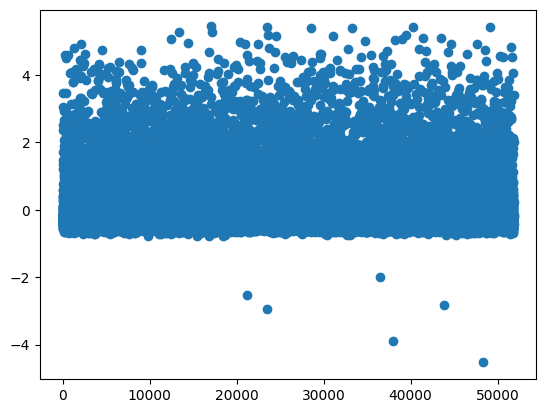

In [ ]:
model_results = eval_models()

In [ ]:
model_results = eval_models()

LinearRegression 9.03567575779331 {}
RandomForestRegressor 0.01385492852843546 {'max_depth': 9, 'n_estimators': 20}


In [ ]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,0.687618,0.678897,0.434675,0.429702,{}


In [ ]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.382634925090409


In [ ]:
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Absolute Error: 0.37618221661430146
R-squared: 0.8221920092647296


# **Regression on one hot encoding:- Pending with NaN error**

In [ ]:
df_encode_one_hot.columns

Index(['Start Date', 'End Date', 'EVSE ID', 'Postal Code', 'Latitude',
       'Longitude', 'Fee', 'Plug In Event Id', 'Driver Postal Code',
       'System S/N', 'Total_time_hours', 'Charging_time_hours',
       'Label_encode_County', 'Numeric_MAC', 'CT2000-HD-CCR',
       'CT2000-HD-GW1-CCR', 'CT2100-HD-CCR', 'CT2100-HD-CDMA-CCR',
       'CT4010-HD-GW', 'CT4020-HD', 'CT4020-HD-GW', 'CTHCR-S', 'CTHDR',
       'CTHDR-S', 'uncommon_model_num', '1213 Newell Rd', '1520 Walnut Dr',
       '250 Hamilton Ave', '275 Cambridge Ave', '3700 Middlefield Rd',
       '400 Cambridge Ave', '445 Bryant St', '475 Cambridge Ave',
       '520 Webster St', '528 High St', '532 Webster St', 'Bryant St',
       'uncommon_add_1', 'PALO ALTO CA / BRYANT #1',
       'PALO ALTO CA / BRYANT #2', 'PALO ALTO CA / BRYANT #5',
       'PALO ALTO CA / BRYANT #6', 'PALO ALTO CA / CAMBRIDGE #1',
       'PALO ALTO CA / CAMBRIDGE #2', 'PALO ALTO CA / HAMILTON #1',
       'PALO ALTO CA / HAMILTON #2', 'PALO ALTO CA / HIGH #1'

In [ ]:
data_df_onehot = df_encode_one_hot.drop(["Total_time_hours"],axis=1)

In [ ]:
df_encode_one_hot.isnull().sum()

Start Date                      248
End Date                        248
EVSE ID                         248
Postal Code                     248
Latitude                        248
                               ... 
Outlet Unreachable                0
Plug Out at Vehicle               0
Plug Removed While Rebooting      0
Unknown                           0
uncommon_ended_by                 0
Length: 70, dtype: int64

In [ ]:
df_encode_label.isnull().sum()

Start Date                   0
End Date                     0
EVSE ID                      0
Postal Code                  0
Latitude                     0
Longitude                    0
Fee                          0
Plug In Event Id             0
Driver Postal Code           0
System S/N                   0
Total_time_hours             0
Charging_time_hours          0
Label_encode_County          0
Numeric_MAC                  0
label_encode_model_num       0
label_encode_add             0
label_encode_station_name    0
label_encode_ended_by        0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_df_onehot, df_encode_one_hot["Total_time_hours"], random_state=42, test_size=0.20)

In [ ]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((207500, 69), (51875, 69))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}}
}

In [ ]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

In [ ]:
model_results = eval_models()

ValueError: ignored

In [ ]:
model_results = eval_models()

In [ ]:
model_results

In [ ]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)